In [139]:
#import rejex
import re
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [140]:
import re

def find_last_number(line):
    numbers = re.findall(r'-?\d+\.\d+|-?\d+', line)
    #check negative sign and keep it with the number
    if numbers:
        return numbers[-1]
    else:
        return None

In [141]:
find_last_number("-22 + -33.5 = -55.5")

'-55.5'

In [142]:
def modify_file(file_name,digits_after_decimal=4):
    with open(file_name) as f:
        content = f.readlines()
    
    #for every line in the file convert to format '1.0 / 2.0 =  answer=0.5000 \n'
    problem=[]
    answer=[]
    for i in range(len(content)):
        
        #find no of equal to sign
        equal_sign = content[i].count('=')
        
        #split
        line=content[i].split('=')
        
        problem.append(line[0])
        
        line[-1]=find_last_number(line[-1])
         #or line[-1] does not have decimal point
        if line[-1] is None or line[-1]=='inf' or line[-1]=='-inf' or line[-1]=='nan' or '.' not in line[-1]:
            #remove the problem last line
            problem.pop()
            continue
        try:
                float(line[-1].strip().replace(' ','').replace('(','').replace(')',''))
                ans=line[-1].strip().replace(' ','').replace('(','').replace(')','')
                answer.append(ans)

            
        except:
            print("Error in line ",i)
            print(line)
            print(line[-1].strip().replace(' ','').replace('(','').replace(')',''))
            print("Error in line ",i)
            
    
    print("Length of problem",len(problem))
    print("Length of answer",len(answer))
                 
    return problem,answer

In [143]:
problem4,predicted_answer_4_digit=modify_file('division_4_digit.txt',4)

problem8,predicted_answer_8_digit=modify_file('division_8_digit.txt',8)

problem12,predicted_answer_12_digit=modify_file('division_12_digit.txt',12)



Length of problem 3424
Length of answer 3424
Length of problem 3396
Length of answer 3396
Length of problem 3241
Length of answer 3241


In [144]:
print(problem[:1000])
print(predicted_answer_4_digit[179])
print(predicted_answer_8_digit[:10])
print(predicted_answer_12_digit[:10])

['1.0 / 2.0 ', '2.0 / 1.0 ', '1.0 / 3.0 ', '3.0 / 1.0 ', '1.0 / 4.0 ', '4.0 / 1.0 ', '1.0 / 5.0 ', '5.0 / 1.0 ', '1.0 / 6.0 ', '6.0 / 1.0 ', '1.0 / 7.0 ', '7.0 / 1.0 ', '1.0 / 8.0 ', '8.0 / 1.0 ', '1.0 / 9.0 ', '9.0 / 1.0 ', '2.0 / 1.0 ', '1.0 / 2.0 ', '2.0 / 3.0 ', '3.0 / 2.0 ', '2.0 / 4.0 ', '4.0 / 2.0 ', '2.0 / 5.0 ', '5.0 / 2.0 ', '2.0 / 6.0 ', '6.0 / 2.0 ', '2.0 / 7.0 ', '7.0 / 2.0 ', '2.0 / 8.0 ', '8.0 / 2.0 ', '2.0 / 9.0 ', '9.0 / 2.0 ', '3.0 / 1.0 ', '1.0 / 3.0 ', '3.0 / 2.0 ', '2.0 / 3.0 ', '3.0 / 4.0 ', '4.0 / 3.0 ', '3.0 / 5.0 ', '5.0 / 3.0 ', '3.0 / 6.0 ', '6.0 / 3.0 ', '3.0 / 7.0 ', '7.0 / 3.0 ', '3.0 / 8.0 ', '8.0 / 3.0 ', '3.0 / 9.0 ', '9.0 / 3.0 ', '4.0 / 1.0 ', '1.0 / 4.0 ', '4.0 / 2.0 ', '2.0 / 4.0 ', '4.0 / 3.0 ', '3.0 / 4.0 ', '4.0 / 5.0 ', '5.0 / 4.0 ', '4.0 / 6.0 ', '6.0 / 4.0 ', '4.0 / 7.0 ', '7.0 / 4.0 ', '4.0 / 8.0 ', '8.0 / 4.0 ', '4.0 / 9.0 ', '9.0 / 4.0 ', '5.0 / 1.0 ', '1.0 / 5.0 ', '5.0 / 2.0 ', '2.0 / 5.0 ', '5.0 / 3.0 ', '3.0 / 5.0 ', '5.0 / 4.0 ', '4.0 

In [145]:
def is_correct(a,b,div,accuracy_digit):
    return round(a/b,accuracy_digit) == round(div,accuracy_digit)

def get_num_digits(num):
    return len(str(num).split('.')[0].replace('-',''))

def rel_error(a, b, ans, sig_figs):
        true_ans = round(a/b, sig_figs)
        return abs(true_ans - ans)/true_ans

In [146]:
MAX_DIGITS=6

total_acc4 = np.zeros((3,2,MAX_DIGITS))
correct_acc4 = np.zeros((3,2,MAX_DIGITS))
#added relative accuracy
relative_error4 = np.zeros((3,2,MAX_DIGITS))


classified_responses_acc4 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number

##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem4)):
    a,b=problem4[i].split('/')

    a=float(a)
    b=float(b)
    #print(a,b,predicted_answer_4_digit[i])

    div=float(predicted_answer_4_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc4[sign,order,num_digits-1] += 1
    correct_acc4[sign,order,num_digits-1] += is_correct(a,b,div,4)
    relative_error4[sign,order,num_digits-1] += rel_error(a,b,div,4)
    


        # classify the response
    classified_responses_acc4[sign][order][num_digits-1].append(problem4[i])

total_acc4 = np.where(total_acc4 == 0, 1, total_acc4)

In [147]:
print('shape of total_acc4',total_acc4.shape)
print('shape of correct_acc4',correct_acc4.shape)
print('shape of relative_error4',relative_error4.shape)

shape of total_acc4 (3, 2, 6)
shape of correct_acc4 (3, 2, 6)
shape of relative_error4 (3, 2, 6)


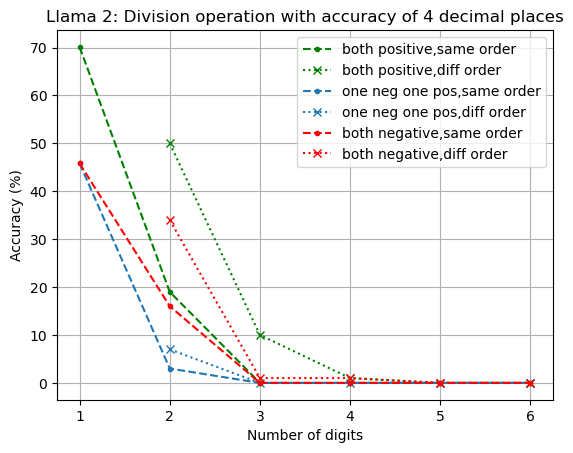

In [148]:
accuracy_acc4 = correct_acc4*100/total_acc4
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc4[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc4[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc4[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc4[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc4[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc4[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 4 decimal places')
plt.legend()
plt.grid()
plt.show()

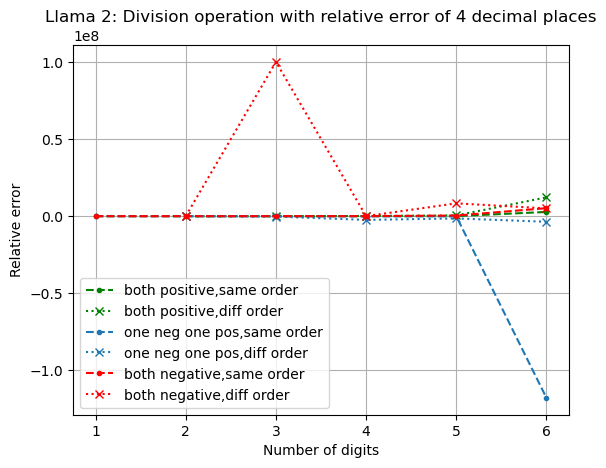

In [149]:

digits = np.arange(1,MAX_DIGITS+1)

# plot relative error for different number of digits
plt.plot(digits, relative_error4[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], relative_error4[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, relative_error4[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], relative_error4[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, relative_error4[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], relative_error4[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Relative error')
plt.title('Llama 2: Division operation with relative error of 4 decimal places')
plt.legend()
plt.grid()
plt.show()

In [168]:
MAX_DIGITS = 6

total_acc8 = np.zeros((3,2,MAX_DIGITS))
correct_acc8 = np.zeros((3,2,MAX_DIGITS))
rel_error8 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc8 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number



##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem8)):

    a,b=problem8[i].split('/')

    a=float(a)
    b=float(b)

    div=float(predicted_answer_8_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc8[sign,order,num_digits-1] += 1
    correct_acc8[sign,order,num_digits-1] += is_correct(a,b,div,8)
    rel_error8[sign,order,num_digits-1] += rel_error(a,b,div,8)
    
    if rel_error(a,b,div,8) > 10000:
        print(a,b,div, a/b, rel_error(a,b,div,8))
        

    # classify the response
    classified_responses_acc8[sign][order][num_digits-1].append(problem8[i])

total_acc8 = np.where(total_acc8 == 0, 1, total_acc8)

-99.0 -73.0 -1285464000.0 1.356164383561644 947867397.4287426
-90.0 -71.0 -123456789.0 1.267605633802817 97393690.39218107
-27.0 -34.0 856105161.4285715 0.7941176470588235 1078058346.4357626
-3.0 -81.0 -375.0 0.037037037037037035 10125.999190000064
-77.0 -7.0 -124357890.0 11.0 11305263.727272727
908.0 427.0 21536.0 2.126463700234192 10126.612335917138
96.0 765.0 1283.428571429 0.12549019607843137 10226.321108971058
10.0 812.0 125.0 0.012315270935960592 10149.000771400059
-941.0 -781.0 -123456789.0 1.204865556978233 102465199.68988536
-908.0 -427.0 -215632000.0 2.126463700234192 101404036.2534586
-10.0 -830.0 -125.0 0.012048192771084338 10376.00238625055
-22.0 -616.0 357.4864864864864 0.03571428571428571 10008.620420467169
-34.0 -788.0 -456.0 0.04314720812182741 10569.470128196006
-100.0 -81.0 -123456789.0 1.2345679012345678 100000000.19
1313.0 8614.0 1527.4 0.15242628279544926 10019.581752700387
11.0 9331.0 12.04545455 0.0011788661451077056 10216.797170171436
10.0 7283.0 1456.0 0.00137

In [151]:
rel_error(-534.0, -3.0, -178.66666667,8)

2.003745318370787

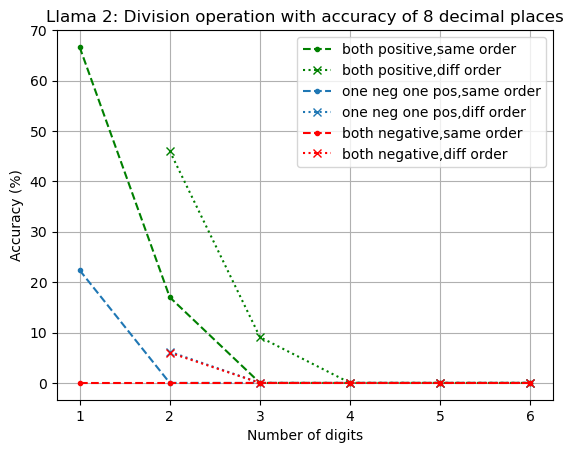

In [152]:
accuracy_acc8 = correct_acc8*100/total_acc8
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc8[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc8[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc8[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc8[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc8[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc8[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 8 decimal places')
plt.legend()
plt.grid()
plt.show()

In [154]:
MAX_DIGITS = 6

total_acc12 = np.zeros((3,2,MAX_DIGITS))
correct_acc12 = np.zeros((3,2,MAX_DIGITS))
relative_error12 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc12 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number



##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem12)):

    a,b=problem12[i].split('/')

    a=float(a)
    b=float(b)

    div=float(predicted_answer_12_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc12[sign,order,num_digits-1] += 1
    correct_acc12[sign,order,num_digits-1] += is_correct(a,b,div,12)
    relative_error12[sign,order,num_digits-1] += rel_error(a,b,div,12)

    # classify the response
    classified_responses_acc12[sign][order][num_digits-1].append(problem12[i])

total_acc12 = np.where(total_acc12 == 0, 1, total_acc12)

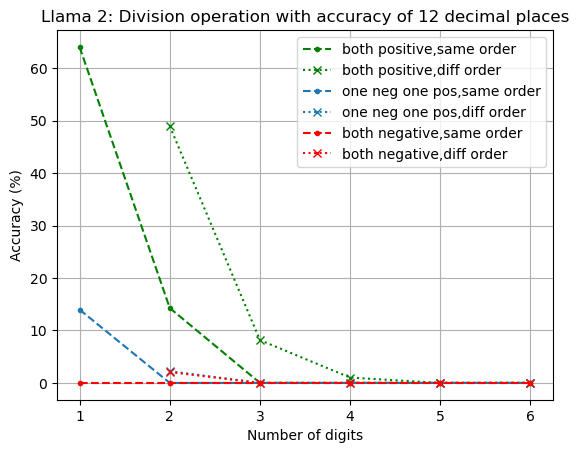

In [155]:
accuracy_acc12 = correct_acc12*100/total_acc12
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc12[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc12[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc12[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc12[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc12[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc12[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 12 decimal places')
plt.legend()
plt.grid()
plt.show()

In [156]:
#############################################reference from gemini code (rushikesh)###################################

def avg_of_non_zero_elem_for_each_digit(arr):
    '''
    calculate the average of non zero elements for each digit (axis 2) across axis 0 and 1
    '''
    # get count of non zero elements across axis 0 and 1
    non_zero_count = np.count_nonzero(arr, axis=(0, 1))

    # get sum of non zero elements across axis 0 and 1
    non_zero_sum = np.sum(arr * (arr != 0), axis=(0, 1))

    # calculate average
    avg = non_zero_sum/(non_zero_count +1e-6)

    return avg

In [157]:
relative_error4

array([[[ 3.01562967e+02,  6.39476524e+03,  8.52500015e+03,
          2.06188657e+04,  6.98648159e+04,  2.74672214e+06],
        [ 0.00000000e+00,  1.02348611e+04,  3.39530428e+04,
          1.19701429e+05,  4.79017985e+05,  1.22168194e+07]],

       [[-3.80912780e+02, -1.54906745e+04, -5.60444872e+03,
         -3.33478206e+04, -7.43630011e+04, -1.17880918e+08],
        [ 0.00000000e+00, -1.17506244e+04, -2.58404139e+05,
         -2.40194847e+06, -1.45724017e+06, -3.62538457e+06]],

       [[ 1.66337235e+02,  4.64866722e+03,  8.71274178e+03,
          2.38381237e+04,  4.10916510e+05,  5.18907304e+06],
        [ 0.00000000e+00,  3.49976272e+03,  1.00056412e+08,
          3.76154360e+04,  8.31227648e+06,  5.04284684e+06]]])

In [158]:
def avg_relative_error(arr):
    '''
    calculate the average of relative error for each digit (axis 2) across axis 0 and 1
    '''
#arr has shape (3,2,max_digits)
#find average of relative error for each digit across axis 0 and 1
    #take mean of relative error across axis 0 and 1
    avg = np.mean(arr, axis=(1))
    return avg

In [159]:
print('Average relative error for 4 decimal places:', avg_relative_error(relative_error4)) 

Average relative error for 4 decimal places: [[ 1.50781484e+02  8.31481318e+03  2.12390215e+04  7.01601472e+04
   2.74441401e+05  7.48177075e+06]
 [-1.90456390e+02 -1.36206494e+04 -1.32004294e+05 -1.21764814e+06
  -7.65801586e+05 -6.07531513e+07]
 [ 8.31686176e+01  4.07421497e+03  5.00325623e+07  3.07267798e+04
   4.36159650e+06  5.11595994e+06]]


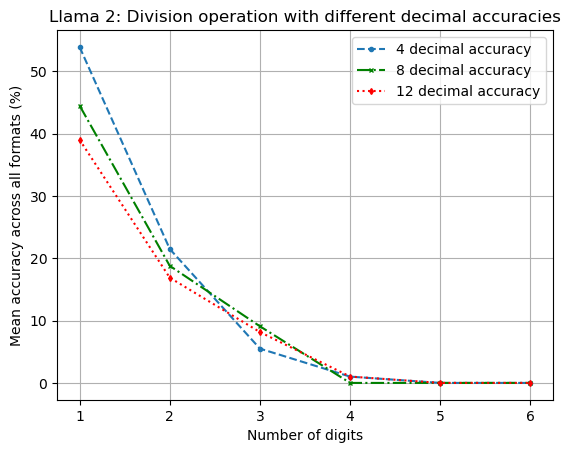

In [160]:
# plot the accuracy for different number of digits
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc4),marker='o',ms=3,linestyle='--',color='#1f77b4',label='4 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc8),marker='x',ms=3,linestyle='-.',color='green',label='8 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc12),marker='d',ms=3,linestyle=':',color='red',label='12 decimal accuracy')
plt.xlabel('Number of digits')
plt.ylabel('Mean accuracy across all formats (%)')
plt.title('Llama 2: Division operation with different decimal accuracies')
plt.legend()
plt.grid()
plt.show()

In [161]:
#print relative error for 4 digit accuracy take entire 0 and 1 axis for 0 th digit
print(relative_error4[0,0])

[3.01562967e+02 6.39476524e+03 8.52500015e+03 2.06188657e+04
 6.98648159e+04 2.74672214e+06]


In [162]:
print("Average relative error for 4 decimal accuracy",avg_relative_error(relative_error4))
print("Average relative error for 8 decimal accuracy",avg_relative_error(rel_error8))
print("Average relative error for 12 decimal accuracy",avg_relative_error(relative_error12))

Average relative error for 4 decimal accuracy [[ 1.50781484e+02  8.31481318e+03  2.12390215e+04  7.01601472e+04
   2.74441401e+05  7.48177075e+06]
 [-1.90456390e+02 -1.36206494e+04 -1.32004294e+05 -1.21764814e+06
  -7.65801586e+05 -6.07531513e+07]
 [ 8.31686176e+01  4.07421497e+03  5.00325623e+07  3.07267798e+04
   4.36159650e+06  5.11595994e+06]]
Average relative error for 8 decimal accuracy [[ 1.82039286e+02  8.96763553e+03  3.28629552e+04  5.50637644e+05
   8.18941168e+05  5.68871591e+06]
 [-7.96505999e+02 -1.37199736e+04 -5.12477693e+07 -5.82069882e+10
  -7.12786116e+06 -6.58249242e+08]
 [ 3.87011777e+02  1.06732496e+09  1.51967079e+08  5.30651088e+11
   1.01936217e+10  4.99283482e+16]]
Average relative error for 12 decimal accuracy [[ 2.02407143e+02  7.96688999e+03  1.18619991e+10  8.26611738e+09
   5.66799928e+10  5.55092307e+11]
 [-2.49505997e+02 -5.32564722e+08 -5.05443928e+11 -5.17841781e+14
  -1.17266667e+12 -9.59509248e+11]
 [ 3.48911777e+02  5.14126909e+08  5.20116996e+11  

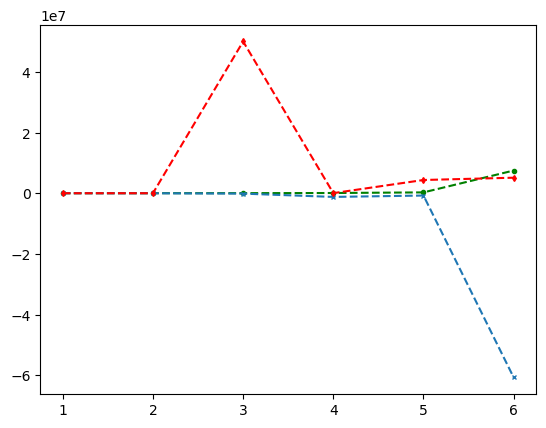

In [163]:
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order numbe

#plot relative error for different number of digits for 4,8 and 12 decimal accuracy and both positive, both negative and one negative one positive

avg_rel_error_4 = avg_relative_error(relative_error4)
avg_rel_error_8 = avg_relative_error(rel_error8)
avg_rel_error_12 = avg_relative_error(relative_error12)

# plot the accuracy for different number of digits for same order
plt.plot(digits, avg_rel_error_4[0],marker='o',ms=3,linestyle='--',color='green',label='4 decimal accuracy')
plt.plot(digits, avg_rel_error_4[1],marker='x',ms=3,linestyle='--',color='#1f77b4',label='8 decimal accuracy')
plt.plot(digits, avg_rel_error_4[2],marker='d',ms=3,linestyle='--',color='red',label='12 decimal accuracy')